## Assignments for Week-03

### 1. Re-code the titanic machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

In [2]:
data = pd.read_csv("/localdisk/pinga/lzy/NLP-class-data/titanic/kaggle-titanic-master/input/train.csv")
data = data.dropna()
age_with_fares = data[(data['Age'] > 22) & (data['Fare'] < 400) & (data['Fare'] > 130)]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares["Age"]

def func(age, k, b):return k * age + b

def loss(y, yhat):
    return np.mean(np.abs(y - yhat))
    #return np.mean(np.square(y - yhat))
    #return np.mean(np.sqrt(y - yhat))

###### 1. Random Choose Method to get optimal *k* and *b*

152.04104648774788
loop == 0
f(age) = 0.9426039667485142 * age + 2.005686568782412, with error rate: 152.04104648774788
63.64970324625221
loop == 4
f(age) = 4.425701368652341 * age + 4.5063697118329475, with error rate: 63.64970324625221
61.764439945782215
loop == 26
f(age) = 3.975088895215178 * age + 4.752065461084067, with error rate: 61.764439945782215
61.648226715236646
loop == 707
f(age) = 4.077587487085319 * age + 9.115491170694575, with error rate: 61.648226715236646
61.343948379398384
loop == 1010
f(age) = 3.8378891147424117 * age + 8.878643039891202, with error rate: 61.343948379398384
61.290037125458745
loop == 3544
f(age) = 3.8337657168487898 * age + 9.264063892374196, with error rate: 61.290037125458745
61.121247948735466
loop == 6020
f(age) = 3.9329434623664348 * age + 9.275166059433428, with error rate: 61.121247948735466


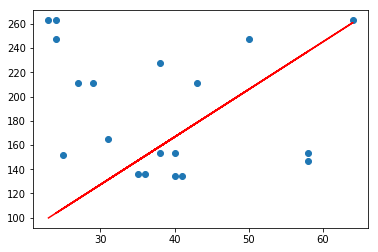

In [5]:
min_error_rate = float('inf')
best_k, best_b = None, None
loop_times = 10000
while loop_times > 0:
    k_hat = random.random() * 20 -10
    b_hat = random.random() * 20 -10
    #k_hat = random.randint(-10, 10)
    #b_hat = random.randint(-10, 10)
    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = loss(y=sub_fare, yhat=estimated_fares)
    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_b = k_hat, b_hat
        print(min_error_rate)
        print('loop == {}'.format(1000 - loop_times))
        print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
    loop_times -= 1
plt.scatter(sub_age, sub_fare)
plt.plot(sub_age, func(sub_age, best_k, best_b),c='r')
plt.show()

###### 2.Supervised Direction to get optimal *k* and *b*

540.9869631288994
loop == 0
f(age) = -9.081370659642522 * age + -4.974039045679244, with error rate: 540.9869631288994
537.7092605939627
loop == 1
f(age) = -8.995787282649314 * age + -4.9575136130097635, with error rate: 537.7092605939627
513.7413934693622
loop == 2
f(age) = -8.372207198861357 * age + -4.751329681171354, with error rate: 513.7413934693622
486.0373455016611
loop == 7
f(age) = -7.65878258472843 * age + -4.232514378325108, with error rate: 486.0373455016611
458.5345349545758
loop == 8
f(age) = -6.955938297595562 * age + -3.5117703514606817, with error rate: 458.5345349545758
452.14762722502104
loop == 13
f(age) = -6.811726778846085 * age + -2.6200804942544287, with error rate: 452.14762722502104
449.81914114668075
loop == 14
f(age) = -6.768025525159852 * age + -1.9568421879580247, with error rate: 449.81914114668075
445.6693391645335
loop == 15
f(age) = -6.681656044882912 * age + -1.0981719805740409, with error rate: 445.6693391645335
420.91713267801464
loop == 17
f(age) 

59.827294702514884
loop == 2036
f(age) = 3.786719305254629 * age + 19.02992762802313, with error rate: 59.827294702514884
59.77295952959987
loop == 2053
f(age) = 3.8130685298144593 * age + 19.35174779979046, with error rate: 59.77295952959987
59.76380618648135
loop == 2112
f(age) = 3.81652356031595 * age + 19.857344247185438, with error rate: 59.76380618648135
59.71781442574561
loop == 2295
f(age) = 3.81755511704032 * age + 20.8302171467047, with error rate: 59.71781442574561
59.57747053354409
loop == 2306
f(age) = 3.7358651131729754 * age + 21.15459208037564, with error rate: 59.57747053354409
59.49440788464352
loop == 2310
f(age) = 3.786950055538414 * age + 22.136855523461204, with error rate: 59.49440788464352
59.48309508850664
loop == 2328
f(age) = 3.740815168536296 * age + 21.699502641737425, with error rate: 59.48309508850664
59.344165649355176
loop == 2342
f(age) = 3.730968060932913 * age + 22.684424904132833, with error rate: 59.344165649355176
59.27272061548461
loop == 2439
f(

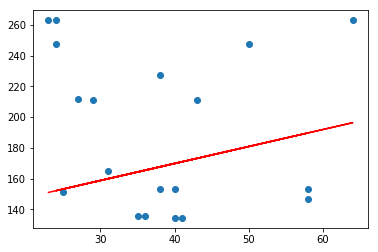

In [6]:
change_directions = [
    (+1, -1), 
    (+1, +1),
    (-1, +1),
    (-1, -1)  
]

def step():return random.random() * 2 - 1

min_error_rate = float('inf')
best_k = random.random() * 20 -10
best_b = random.random() * 20 -10
loop_times = 10000
direction = random.choice(change_directions)

while loop_times > 0:
    k_delta_direction, b_delta_direction = direction
    k_delta = k_delta_direction * step()
    b_delta = b_delta_direction * step()
    
    new_k = best_k + k_delta
    new_b = best_b + b_delta
    
    estimated_fares = func(sub_age, new_k, new_b)
    error_rate = loss(y=sub_fare, yhat=estimated_fares)
    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_b = new_k, new_b
        
        direction = (k_delta_direction, b_delta_direction)
        print(min_error_rate)
        print('loop == {}'.format(10000 - loop_times))
        print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
    else :
        direction = random.choice(change_directions)
    loop_times -= 1
plt.scatter(sub_age, sub_fare)
plt.plot(sub_age, func(sub_age, best_k, best_b),c='r')
plt.show()

###### 3.Gradient Descent to get optimal *k* and *b*

loop == 0
f(age) = 0.2740159645281963 * age + 9.144840651457356, with error rate: 170.37861417388925
loop == 1
f(age) = 4.08454228031767 * age + 9.244840651457356, with error rate: 61.67655885573889
loop == 2
f(age) = 3.5792791224229337 * age + 9.250103809352092, with error rate: 62.810265901616525
loop == 3
f(age) = 4.937173859265039 * age + 9.297472230404724, with error rate: 67.97064447389239
loop == 4
f(age) = 3.4529633329492495 * age + 9.281682756720514, with error rate: 64.72579946330643
loop == 5
f(age) = 5.1898054382124075 * age + 9.339577493562619, with error rate: 72.29075569541483
loop == 6
f(age) = 3.3792791224229335 * age + 9.313261704088934, with error rate: 65.98729530818177
loop == 7
f(age) = 5.116121227686092 * age + 9.371156440931038, with error rate: 70.96499392256162
loop == 8
f(age) = 3.305594911896618 * age + 9.344840651457353, with error rate: 67.24879115305711
loop == 9
f(age) = 5.042437017159775 * age + 9.402735388299458, with error rate: 69.6392321497084
loop 

f(age) = 3.2424370171597516 * age + 11.755366967246763, with error rate: 66.95017619460883
loop == 151
f(age) = 4.979279122422909 * age + 11.813261704088868, with error rate: 69.13009087546975
loop == 152
f(age) = 3.168752806633435 * age + 11.786945914615183, with error rate: 68.21167203948417
loop == 153
f(age) = 4.905594911896593 * age + 11.844840651457288, with error rate: 67.90416247943217
loop == 154
f(age) = 3.421384385580803 * age + 11.829051177773078, with error rate: 63.79948367383323
loop == 155
f(age) = 5.158226490843961 * age + 11.886945914615183, with error rate: 72.38937065386308
loop == 156
f(age) = 3.347700175054487 * age + 11.860630125141498, with error rate: 65.06097951870858
loop == 157
f(age) = 5.084542280317645 * age + 11.918524861983602, with error rate: 71.0636088810099
loop == 158
f(age) = 3.2740159645281715 * age + 11.892209072509917, with error rate: 66.3224753635839
loop == 159
f(age) = 5.010858069791329 * age + 11.950103809352022, with error rate: 69.7378471

f(age) = 4.884542280317591 * age + 17.244840651457128, with error rate: 68.84421829929141
loop == 472
f(age) = 3.074015964528117 * age + 17.218524861983443, with error rate: 66.71250306441597
loop == 473
f(age) = 4.810858069791275 * age + 17.276419598825548, with error rate: 67.51845652643823
loop == 474
f(age) = 3.0003317540018006 * age + 17.250103809351863, with error rate: 67.97399890929134
loop == 475
f(age) = 4.737173859264958 * age + 17.307998546193968, with error rate: 66.2670433658579
loop == 476
f(age) = 3.2529633329491685 * age + 17.292209072509756, with error rate: 63.56181054364038
loop == 477
f(age) = 4.9898054382123265 * age + 17.35010380935186, with error rate: 70.77773630483156
loop == 478
f(age) = 3.1792791224228525 * age + 17.323788019878176, with error rate: 64.82330638851572
loop == 479
f(age) = 4.916121227686011 * age + 17.38168275672028, with error rate: 69.4519745319784
loop == 480
f(age) = 3.105594911896537 * age + 17.355366967246596, with error rate: 66.0848022

loop == 1015
f(age) = 3.295068596107008 * age + 26.09747223040439, with error rate: 59.76598055096953
loop == 1016
f(age) = 3.863489648738587 * age + 26.123788019878074, with error rate: 59.67129569784349
loop == 1017
f(age) = 3.35822649084385 * age + 26.129051177772812, with error rate: 59.42805256629885
loop == 1018
f(age) = 3.526647543475429 * age + 26.144840651457024, with error rate: 59.14190298181132
loop == 1019
f(age) = 3.695068596107008 * age + 26.160630125141235, with error rate: 58.85575339732378
loop == 1020
f(age) = 3.8634896487385872 * age + 26.176419598825447, with error rate: 59.668525614740986
loop == 1021
f(age) = 3.35822649084385 * age + 26.181682756720186, with error rate: 59.419742316991375
loop == 1022
f(age) = 3.526647543475429 * age + 26.197472230404397, with error rate: 59.13359273250385
loop == 1023
f(age) = 3.695068596107008 * age + 26.21326170408861, with error rate: 58.8474431480163
loop == 1024
f(age) = 3.8634896487385872 * age + 26.22905117777282, with er

loop == 1591
f(age) = 3.231910701370171 * age + 33.739577493562656, with error rate: 58.43913289870877
loop == 1592
f(age) = 3.40033175400175 * age + 33.755366967246864, with error rate: 58.15298331422124
loop == 1593
f(age) = 3.568752806633329 * age + 33.77115644093107, with error rate: 57.86683372973371
loop == 1594
f(age) = 3.737173859264908 * age + 33.78694591461528, with error rate: 58.62974445130611
loop == 1595
f(age) = 3.231910701370171 * age + 33.79220907251002, with error rate: 58.430822649401286
loop == 1596
f(age) = 3.40033175400175 * age + 33.80799854619423, with error rate: 58.14467306491376
loop == 1597
f(age) = 3.568752806633329 * age + 33.823788019878435, with error rate: 57.85852348042622
loop == 1598
f(age) = 3.737173859264908 * age + 33.83957749356264, with error rate: 58.62697436820361
loop == 1599
f(age) = 3.231910701370171 * age + 33.84484065145738, with error rate: 58.42251240009383
loop == 1600
f(age) = 3.40033175400175 * age + 33.86063012514159, with error rat

f(age) = 2.958226490843856 * age + 42.3185248619828, with error rate: 57.54550408984465
loop == 2244
f(age) = 3.126647543475435 * age + 42.33431433566701, with error rate: 57.2593545053571
loop == 2245
f(age) = 3.295068596107014 * age + 42.35010380935122, with error rate: 56.97320492086958
loop == 2246
f(age) = 3.463489648738593 * age + 42.365893283035426, with error rate: 56.79539542083523
loop == 2247
f(age) = 2.958226490843856 * age + 42.371156440930164, with error rate: 57.53719384053717
loop == 2248
f(age) = 3.126647543475435 * age + 42.38694591461437, with error rate: 57.25104425604963
loop == 2249
f(age) = 3.295068596107014 * age + 42.40273538829858, with error rate: 56.9648946715621
loop == 2250
f(age) = 3.463489648738593 * age + 42.41852486198279, with error rate: 56.79262533773275
loop == 2251
f(age) = 2.958226490843856 * age + 42.42378801987753, with error rate: 57.52888359122969
loop == 2252
f(age) = 3.126647543475435 * age + 42.439577493561735, with error rate: 57.24273400

f(age) = 3.295068596107014 * age + 49.66589328303465, with error rate: 55.81808026713008
loop == 2802
f(age) = 3.463489648738593 * age + 49.68168275671886, with error rate: 56.41035386958874
loop == 2803
f(age) = 2.958226490843856 * age + 49.686945914613595, with error rate: 56.38206918679766
loop == 2804
f(age) = 3.126647543475435 * age + 49.7027353882978, with error rate: 56.09591960231015
loop == 2805
f(age) = 3.295068596107014 * age + 49.71852486198201, with error rate: 55.809770017822615
loop == 2806
f(age) = 3.463489648738593 * age + 49.73431433566622, with error rate: 56.40758378648625
loop == 2807
f(age) = 2.958226490843856 * age + 49.73957749356096, with error rate: 56.373758937490194
loop == 2808
f(age) = 3.126647543475435 * age + 49.755366967245166, with error rate: 56.08760935300267
loop == 2809
f(age) = 3.295068596107014 * age + 49.771156440929374, with error rate: 55.80145976851514
loop == 2810
f(age) = 3.463489648738593 * age + 49.78694591461358, with error rate: 56.4048

f(age) = 2.7898054382122774 * age + 58.72378801987579, with error rate: 55.23885589039894
loop == 3491
f(age) = 2.9582264908438565 * age + 58.73957749356, with error rate: 54.9527063059114
loop == 3492
f(age) = 3.1266475434754355 * age + 58.75536696724421, with error rate: 54.666556721423866
loop == 3493
f(age) = 3.2950685961070145 * age + 58.771156440928415, with error rate: 55.08099098870238
loop == 3494
f(age) = 2.7898054382122774 * age + 58.77641959882315, with error rate: 55.230545641091446
loop == 3495
f(age) = 2.9582264908438565 * age + 58.79220907250736, with error rate: 54.94439605660392
loop == 3496
f(age) = 3.1266475434754355 * age + 58.80799854619157, with error rate: 54.65824647211639
loop == 3497
f(age) = 3.2950685961070145 * age + 58.82378801987578, with error rate: 55.07822090559988
loop == 3498
f(age) = 2.7898054382122774 * age + 58.829051177770516, with error rate: 55.22223539178398
loop == 3499
f(age) = 2.9582264908438565 * age + 58.844840651454724, with error rate: 

loop == 4043
f(age) = 2.631910701370173 * age + 65.99220907250633, with error rate: 54.35713843887556
loop == 4044
f(age) = 2.800331754001752 * age + 66.00799854619054, with error rate: 54.07098885438803
loop == 4045
f(age) = 2.968752806633331 * age + 66.02378801987474, with error rate: 53.78483926990048
loop == 4046
f(age) = 3.13717385926491 * age + 66.03957749355895, with error rate: 53.90065857873013
loop == 4047
f(age) = 2.631910701370173 * age + 66.04484065145368, with error rate: 54.348828189568096
loop == 4048
f(age) = 2.800331754001752 * age + 66.06063012513789, with error rate: 54.06267860508055
loop == 4049
f(age) = 2.968752806633331 * age + 66.0764195988221, with error rate: 53.77652902059301
loop == 4050
f(age) = 3.13717385926491 * age + 66.09220907250631, with error rate: 53.89788849562765
loop == 4051
f(age) = 2.631910701370173 * age + 66.09747223040104, with error rate: 54.34051794026059
loop == 4052
f(age) = 2.800331754001752 * age + 66.11326170408525, with error rate: 

f(age) = 2.410858069791254 * age + 74.6816827567154, with error rate: 53.357415447185986
loop == 4729
f(age) = 2.579279122422833 * age + 74.69747223039961, with error rate: 53.07126586269845
loop == 4730
f(age) = 2.747700175054412 * age + 74.71326170408382, with error rate: 52.7851162782109
loop == 4731
f(age) = 2.916121227685991 * age + 74.72905117776803, with error rate: 52.526557139621666
loop == 4732
f(age) = 2.7582264908438856 * age + 74.73431433566276, with error rate: 52.76406364663197
loop == 4733
f(age) = 2.9266475434754646 * age + 74.75010380934697, with error rate: 52.54206960499564
loop == 4734
f(age) = 2.7687528066333593 * age + 74.7553669672417, with error rate: 52.743011015053014
loop == 4735
f(age) = 2.9371738592649383 * age + 74.7711564409259, with error rate: 52.55758207036959
loop == 4736
f(age) = 2.779279122422833 * age + 74.77641959882064, with error rate: 52.72195838347408
loop == 4737
f(age) = 2.947700175054412 * age + 74.79220907250485, with error rate: 52.61993

loop == 5275
f(age) = 2.6529633329491786 * age + 80.98168275671435, with error rate: 51.95492237239386
loop == 5276
f(age) = 2.8213843855807577 * age + 80.99747223039856, with error rate: 52.04705575458022
loop == 5277
f(age) = 2.6634896487386523 * age + 81.00273538829329, with error rate: 51.93386974081491
loop == 5278
f(age) = 2.8319107013702314 * age + 81.0185248619775, with error rate: 52.09059899850506
loop == 5279
f(age) = 2.410858069791284 * age + 81.01326170408277, with error rate: 52.357692455496355
loop == 5280
f(age) = 2.579279122422863 * age + 81.02905117776697, with error rate: 52.07154287100882
loop == 5281
f(age) = 2.747700175054442 * age + 81.04484065145118, with error rate: 51.928219189483265
loop == 5282
f(age) = 2.5898054382123368 * age + 81.05010380934591, with error rate: 52.05049023942987
loop == 5283
f(age) = 2.758226490843916 * age + 81.06589328303012, with error rate: 51.943731654857224
loop == 5284
f(age) = 2.6003317540018105 * age + 81.07115644092485, with er

loop == 5881
f(age) = 2.674015964528143 * age + 87.16063012513362, with error rate: 51.74904775196764
loop == 5882
f(age) = 2.2529633329491956 * age + 87.15536696723889, with error rate: 51.65381433915311
loop == 5883
f(age) = 2.4213843855807746 * age + 87.1711564409231, with error rate: 51.36766475466557
loop == 5884
f(age) = 2.5898054382123536 * age + 87.1869459146073, with error rate: 51.395862156399765
loop == 5885
f(age) = 2.1687528066334063 * age + 87.18168275671258, with error rate: 51.79148746934702
loop == 5886
f(age) = 2.3371738592649853 * age + 87.19747223039678, with error rate: 51.505337884859486
loop == 5887
f(age) = 2.5055949118965644 * age + 87.21326170408099, with error rate: 51.22129398172715
loop == 5888
f(age) = 2.347700175054459 * age + 87.21852486197572, with error rate: 51.484285253280525
loop == 5889
f(age) = 2.516121227686038 * age + 87.23431433565993, with error rate: 51.23680644710111
loop == 5890
f(age) = 2.3582264908439328 * age + 87.23957749355466, with er

loop == 6499
f(age) = 2.38980543821239 * age + 93.22378801987017, with error rate: 50.87148542509796
loop == 6500
f(age) = 1.9687528066334425 * age + 93.21852486197544, with error rate: 51.175143979042296
loop == 6501
f(age) = 2.1371738592650216 * age + 93.23431433565965, with error rate: 50.88899439455476
loop == 6502
f(age) = 2.3055949118966006 * age + 93.25010380934386, with error rate: 50.60284481006722
loop == 6503
f(age) = 2.4740159645281796 * age + 93.26589328302806, with error rate: 51.22827212869906
loop == 6504
f(age) = 2.0529633329492323 * age + 93.26063012513333, with error rate: 51.026667524748675
loop == 6505
f(age) = 2.2213843855808113 * age + 93.27641959881754, with error rate: 50.74051794026113
loop == 6506
f(age) = 2.3898054382123903 * age + 93.29220907250175, with error rate: 50.8750865331312
loop == 6507
f(age) = 1.968752806633443 * age + 93.28694591460702, with error rate: 51.16434065494258
loop == 6508
f(age) = 2.137173859265022 * age + 93.30273538829123, with err

f(age) = 1.9371738592650574 * age + 98.69747223039636, with error rate: 50.36323262170154
loop == 7062
f(age) = 2.1055949118966364 * age + 98.71326170408057, with error rate: 50.07708303721399
loop == 7063
f(age) = 2.2740159645282154 * age + 98.72905117776477, with error rate: 50.6737014915801
loop == 7064
f(age) = 1.852963332949268 * age + 98.72378801987004, with error rate: 50.50090575189543
loop == 7065
f(age) = 2.021384385580847 * age + 98.73957749355425, with error rate: 50.214756167407906
loop == 7066
f(age) = 2.189805438212426 * age + 98.75536696723846, with error rate: 50.32051589601224
loop == 7067
f(age) = 1.7687528066334788 * age + 98.75010380934373, with error rate: 50.63857888208934
loop == 7068
f(age) = 1.9371738592650578 * age + 98.76589328302794, with error rate: 50.3524292976018
loop == 7069
f(age) = 2.105594911896637 * age + 98.78168275671214, with error rate: 50.066279713114284
loop == 7070
f(age) = 2.274015964528216 * age + 98.79747223039635, with error rate: 50.677

f(age) = 1.6003317540019344 * age + 105.19747223039612, with error rate: 49.9042298516184
loop == 7731
f(age) = 1.7687528066335134 * age + 105.21326170408032, with error rate: 49.61808026713087
loop == 7732
f(age) = 1.9371738592650924 * age + 105.22905117776453, with error rate: 49.597524206261696
loop == 7733
f(age) = 1.516121227686145 * age + 105.2237880198698, with error rate: 50.041902981812314
loop == 7734
f(age) = 1.6845422803177241 * age + 105.23957749355401, with error rate: 49.75575339732479
loop == 7735
f(age) = 1.8529633329493032 * age + 105.25536696723822, with error rate: 49.472703843465744
loop == 7736
f(age) = 1.75822649084404 * age + 105.26063012513295, with error rate: 49.628329574610106
loop == 7737
f(age) = 1.926647543475619 * age + 105.27641959881716, with error rate: 49.55569595141404
loop == 7738
f(age) = 1.5055949118966716 * age + 105.27115644092243, with error rate: 50.05215228929154
loop == 7739
f(age) = 1.6740159645282506 * age + 105.28694591460663, with error

loop == 8280
f(age) = 1.35822649084406 * age + 110.4395774935532, with error rate: 49.484285253280554
loop == 8281
f(age) = 1.526647543475639 * age + 110.45536696723741, with error rate: 49.19813566879302
loop == 8282
f(age) = 1.695068596107218 * age + 110.47115644092162, with error rate: 49.04860412047412
loop == 8283
f(age) = 1.6003317540019548 * age + 110.47641959881635, with error rate: 49.070711846078346
loop == 8284
f(age) = 1.7687528066335338 * age + 110.49220907250056, with error rate: 49.165391242272804
loop == 8285
f(age) = 1.3477001750545865 * age + 110.48694591460583, with error rate: 49.49453456075978
loop == 8286
f(age) = 1.5161212276861655 * age + 110.50273538829003, with error rate: 49.20838497627225
loop == 8287
f(age) = 1.6845422803177446 * age + 110.51852486197424, with error rate: 49.036138746512904
loop == 8288
f(age) = 1.5898054382124813 * age + 110.52378801986897, with error rate: 49.08096115355756
loop == 8289
f(age) = 1.7582264908440604 * age + 110.539577493553

f(age) = 1.3477001750545967 * age + 115.74484065144652, with error rate: 48.664340654942805
loop == 8847
f(age) = 1.5161212276861757 * age + 115.76063012513073, with error rate: 48.60068168280107
loop == 8848
f(age) = 1.4213843855809125 * age + 115.76589328302546, with error rate: 48.53691683222814
loop == 8849
f(age) = 1.5898054382124915 * age + 115.78168275670967, with error rate: 48.69032199019521
loop == 8850
f(age) = 1.1687528066335442 * age + 115.77641959881494, with error rate: 48.960739546909565
loop == 8851
f(age) = 1.3371738592651232 * age + 115.79220907249915, with error rate: 48.67458996242204
loop == 8852
f(age) = 1.5055949118967022 * age + 115.80799854618336, with error rate: 48.588216308839854
loop == 8853
f(age) = 1.410858069791439 * age + 115.81326170407809, with error rate: 48.54716613970735
loop == 8854
f(age) = 1.579279122423018 * age + 115.8290511777623, with error rate: 48.65691436978168
loop == 8855
f(age) = 1.4845422803177548 * age + 115.83431433565703, with err

loop == 9493
f(age) = 1.2003317540019567 * age + 121.62378801986489, with error rate: 47.99292545011422
loop == 9494
f(age) = 1.1055949118966935 * age + 121.62905117775962, with error rate: 48.14301101505406
loop == 9495
f(age) = 1.2740159645282725 * age + 121.64484065144383, with error rate: 48.06162351105606
loop == 9496
f(age) = 1.1792791224230093 * age + 121.65010380933856, with error rate: 48.01558719233939
loop == 9497
f(age) = 1.3477001750545883 * age + 121.66589328302277, with error rate: 48.13032157199789
loop == 9498
f(age) = 1.252963332949325 * age + 121.6711564409175, with error rate: 48.04029387116686
loop == 9499
f(age) = 1.1582264908440618 * age + 121.67641959881223, with error rate: 48.04688913139755
loop == 9500
f(age) = 1.3266475434756408 * age + 121.69220907249644, with error rate: 48.108991932108694
loop == 9501
f(age) = 1.2319107013703776 * age + 121.69747223039117, with error rate: 48.018964231277664
loop == 9502
f(age) = 1.1371738592651144 * age + 121.70273538828

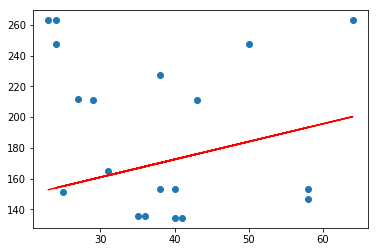

In [6]:
def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])


def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

new_k = random.random() * 20 -10
new_b = random.random() * 20 -10
loop_times = 10000

learning_rate = 1e-1

while loop_times > 0:
    k_delta = -1 * learning_rate * derivate_k(sub_fare,func(sub_age, new_k, new_b), sub_age)
    b_delta = -1 * learning_rate  * derivate_b(sub_fare, func(sub_age, new_k, new_b))
    
    new_k += k_delta
    new_b += b_delta
    
    estimated_fares = func(sub_age, new_k, new_b)
    error_rate = loss(y=sub_fare, yhat=estimated_fares)
    print('loop == {}'.format(10000 - loop_times))
    print('f(age) = {} * age + {}, with error rate: {}'.format(new_k, new_b, error_rate))
    loop_times -= 1
plt.scatter(sub_age, sub_fare)
plt.plot(sub_age, func(sub_age, new_k, new_b),c='r')
plt.show()

## 2. Answer following questions:


###### 1. Why we need machine learning methods instead of creating a complicated formula?


Ans:  
使用复杂公式时，即对历史数据拟合程度过高，对未知数据的预测能力就会下降，即泛化能力较弱。

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:  
收敛速度较慢，迭代更新完全随机，损失函数可能增大可能减小。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:
supervised direction比Random Choose 方法更好，收敛速度加快，参数朝着损失函数减小的方向变化，而且最后的损失更小。
supervised direction：参数过多时，方向的设定则会爆炸增长。

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:  
target function能够根据Derivative决定参数变化的方向

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:  
Gredient 即为函数上升最快的方向
Descent ：Gradient的相反方向，即为函数下降最快的方向

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:  
参数变化方向不需手工指定，由损失函数自身特性决定；
当参数很多时，该方法有较高通用性，有些框架能够对损失函数自动求导。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: 
通过在历史数据上构建模型来预测未知数据。

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-April-20

>Submit: Submit the source code and result to github. 



#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package requests page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is get station information of all the subway lines;

> e.	You may need install @package beautiful soup  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> a.	Build the search agent based on the graph we build.

> b.	As much as you can to use the already implemented search agent. You just need to define the is_goal, get_successor, strategy three functions. 


##### 4.	Create different policies for transfer system.

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


In [32]:
from bs4 import BeautifulSoup
import requests
import re
import os
import urllib.request
import pandas as pd
import networkx as nx
%matplotlib inline

In [2]:
def func():
    url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
    response = urllib.request.urlopen(url)
    html = response.read().decode('utf8')
    soup = BeautifulSoup(html,'lxml')
    table = soup.find_all('table')[2]
    zzr = table.find_all('a')
    dic = {item.get_text():item.get('href')for item in zzr}
    dic.pop('\xa0')
    return dic

In [3]:
dic =func()

In [9]:
def dic_d(dic):
    dic_df = {}
    for key in dic.keys():
        ur = 'https://baike.baidu.com' + dic[key]
        response = urllib.request.urlopen(ur)
        html = response.read().decode('utf8')
        soup = BeautifulSoup(html,'lxml')
        table = soup.find_all('table')
        for item in table:
            if item.find_all('th',string = '方向'):
                df = pd.read_html(str(item), header=0)
                dic_df[key] = df[0]
    return dic_df
    

In [10]:
dicdf = dic_d(dic)

In [11]:
dicdf.keys() #爬取的地铁线路

dict_keys(['北京地铁1号线', '北京地铁2号线', '北京地铁4号线', '北京地铁5号线', '北京地铁6号线', '北京地铁7号线', '北京地铁8号线', '北京地铁10号线', '北京地铁13号线', '北京地铁14号线', '北京地铁15号线', '北京地铁八通线', '北京地铁昌平线', '北京地铁房山线'])

In [12]:
dic.keys() #现有地铁线路

dict_keys(['北京地铁1号线', '北京地铁2号线', '北京地铁4号线', '北京地铁5号线', '北京地铁6号线', '北京地铁7号线', '北京地铁8号线', '北京地铁9号线', '北京地铁10号线', '北京地铁13号线', '北京地铁14号线', '北京地铁15号线', '北京地铁16号线', '北京地铁八通线', '北京地铁昌平线', '北京地铁亦庄线', '北京地铁房山线', '北京地铁S1线', '北京地铁燕房线'])

In [81]:
dicdf["北京地铁10号线"]

,起始/终到车站,区间距离,方向
0,巴沟——苏州街,1110米,上行/下行
1,苏州街——海淀黄庄,950米,上行/下行
2,海淀黄庄——知春里,975米,上行/下行
3,知春里——知春路,1058米,上行/下行
4,知春路——西土城,1101米,上行/下行
5,西土城——牡丹园,1330米,上行/下行
6,牡丹园——健德门,973米,上行/下行
7,健德门——北土城,1.1千米,上行/下行
8,北土城——安贞门,1020米,上行/下行
9,安贞门——惠新西街南口,982米,上行/下行


### 部分线路在百度百科上没有站间距离，故未提取

In [79]:
def graph_func(dic):
    G = nx.Graph()
    p = re.compile(r'\d+')
    for key in dic:
        for index,row in dic[key].iterrows():
            a = row[0].split('——')[0]
            b = row[0].split('——')[1]
            try:
                weight = int(p.findall(row[1])[0])/1000
            except:
                weight = int(row[1])/1000
            G.add_edge(a,b,weight=weight)
    return G

In [80]:
G = graph_func(dicdf)

/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/pinga/anaconda3/lib/python3.6/

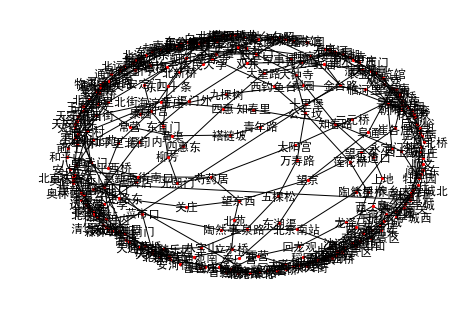

In [82]:
nx.draw(G, with_labels=True, node_size=5) #随后对画图进行调整

In [84]:
G.edges()

[('苹果园', '古城'),
 ('古城', '八角游乐园'),
 ('八角游乐园', '八宝山'),
 ('八宝山', '玉泉路'),
 ('玉泉路', '五棵松'),
 ('五棵松', '万寿路'),
 ('万寿路', '公主坟'),
 ('公主坟', '军事博物馆'),
 ('公主坟', '莲花桥'),
 ('公主坟', '西钓鱼台'),
 ('军事博物馆', '木樨地'),
 ('木樨地', '南礼士路'),
 ('南礼士路', '复兴门'),
 ('复兴门', '西单'),
 ('复兴门', '阜成门'),
 ('复兴门', '长椿街'),
 ('西单', '天安门西'),
 ('西单', '灵境胡同'),
 ('西单', '宣武门'),
 ('天安门西', '天安门东'),
 ('天安门东', '王府井'),
 ('王府井', '东单'),
 ('东单', '建国门'),
 ('东单', '灯市口'),
 ('东单', '崇文门'),
 ('建国门', '永安里'),
 ('建国门', '北京站'),
 ('建国门', '朝阳门'),
 ('永安里', '国贸'),
 ('国贸', '大望路'),
 ('国贸', '金台夕照'),
 ('国贸', '双井'),
 ('大望路', '四惠'),
 ('大望路', '九龙山'),
 ('大望路', '红庙'),
 ('四惠', '四惠东'),
 ('四惠东', '高碑店'),
 ('西直门', '车公庄'),
 ('西直门', '积水潭'),
 ('西直门', '动物园'),
 ('西直门', '新街口'),
 ('西直门', '大钟寺'),
 ('车公庄', '阜成门'),
 ('车公庄', '车公庄西'),
 ('车公庄', '平安里'),
 ('长椿街', '宣武门'),
 ('宣武门', '和平门'),
 ('宣武门', '菜市口'),
 ('和平门', '前门'),
 ('前门', '崇文门'),
 ('崇文门', '北京站'),
 ('崇文门', '磁器口'),
 ('朝阳门', '东四十条'),
 ('朝阳门', '东四'),
 ('朝阳门', '东大桥'),
 ('东四十条', '东直门'),
 ('东直门', '雍和宫'),
 ('东直门', '柳芳'),
 ('雍和宫', '安定门'),

In [103]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

In [104]:
def search(graph, start, is_goal, search_strategy):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = graph[froniter].keys()
        
        for city in successors: 
            if city in path: continue
            
            new_path = path+[city]
            
            pathes.append(new_path)
        
            if is_goal(new_path): return new_path
#        print('len(pathes)={}'.format(pathes))
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [107]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted


def get_path_distance(path,g=G):
    distance = 0
    
    for i, c in enumerate(path[:-1]):
        distance += g[c][path[i+1]]['weight']
    
    return distance

def get_total_station(path):
    return len(path)

def get_comprehensive_path(path):
    return get_path_distance(path) + get_total_station(path)


In [115]:
s = '车公庄' #始发
e = '望京东' #目的

In [116]:
search(G, start=s, is_goal=is_goal(e), search_strategy=sort_path(get_path_distance, beam=10))#最短距离

['车公庄',
 '西直门',
 '积水潭',
 '鼓楼大街',
 '安德里北街',
 '安华桥',
 '北土城',
 '安贞门',
 '惠新西街南口',
 '惠新西街北口',
 '大屯路东',
 '关庄',
 '望京西',
 '望京',
 '望京东']

In [117]:
search(G, start=s, is_goal=is_goal(e), search_strategy=sort_path(get_total_station, beam=10))#最少站

['车公庄',
 '西直门',
 '积水潭',
 '鼓楼大街',
 '安德里北街',
 '安华桥',
 '北土城',
 '奥体中心',
 '奥林匹克公园',
 '安立路',
 '大屯路东',
 '北苑路北',
 '立水桥南',
 '立水桥',
 '北苑',
 '望京西',
 '望京',
 '望京东']

In [118]:
search(G, start=s, is_goal=is_goal(e), search_strategy=sort_path(get_comprehensive_path, beam=10))#综合

['车公庄',
 '西直门',
 '积水潭',
 '鼓楼大街',
 '安德里北街',
 '安华桥',
 '北土城',
 '安贞门',
 '惠新西街南口',
 '惠新西街北口',
 '大屯路东',
 '关庄',
 '望京西',
 '望京',
 '望京东']